In [14]:
from tqdm import tqdm
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("verified.dat", 
                 names=["uid", "name", "friends", "friends_count", 
                        "followers_count", "listed_count", "statuses_count", 
                        "created_at", "url", "avatar", "location"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335018 entries, 0 to 335017
Data columns (total 11 columns):
uid                335018 non-null int64
name               335017 non-null object
friends            335018 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
created_at         335018 non-null object
url                269170 non-null object
avatar             332540 non-null object
location           269760 non-null object
dtypes: int64(5), object(6)
memory usage: 28.1+ MB


In [173]:
df.head(3)

,uid,name,friends,friends_count,followers_count,listed_count,statuses_count,created_at,url,avatar,location,year,month
0,26642006,Alyssa_Milano,friends,4381,3638372,37370,59701,Thu Mar 26 00:34:20 +0000 2009,https://t.co/DOhhBYiEHZ,img/26642006.jpg,Los Angeles,2009,Mar
1,46233559,rosemcgowan,friends,4661,890406,8280,13880,Wed Jun 10 21:39:32 +0000 2009,https://t.co/hinkEjQ5ex,img/46233559.jpg,Planet 9,2009,Jun
2,44783853,HHSGov,friends,396,779017,8545,19885,Fri Jun 05 01:14:31 +0000 2009,https://t.co/T4j355Evo7,img/44783853.jpg,Washington D.C.,2009,Jun


In [168]:
pd.options.display.float_format = '{:.2f}'.format

In [171]:
df['friends_count', 'followers_count', 'listed_count', 'statuses_count'].describe()

,friends_count,followers_count,listed_count,statuses_count
count,335018.00,335018.00,335018.00,335018.00
mean,2074.95,116570.99,510.01,16671.92
std,22208.58,934332.54,6177.52,115636.65
min,0.00,0.00,0.00,0.00
25%,187.00,3092.00,44.00,1611.00
50%,532.00,10152.00,122.00,5366.00
75%,1230.00,38730.75,344.00,14881.00
max,4494592.00,108831215.00,3177668.00,50437226.00


In [95]:
fol_max = 1000000

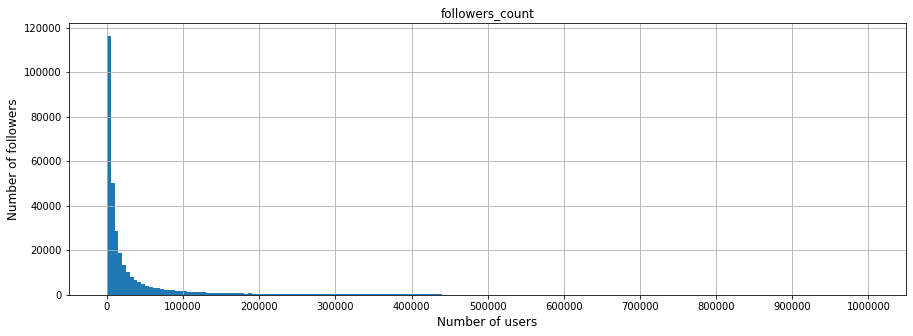

In [142]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
df[df['followers_count'] < fol_max].hist(column='followers_count', bins=200, ax=ax)
plt.xticks(np.arange(0, fol_max+1, fol_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of followers",fontsize=12)

plt.show()

In [102]:
fr_max = 10000

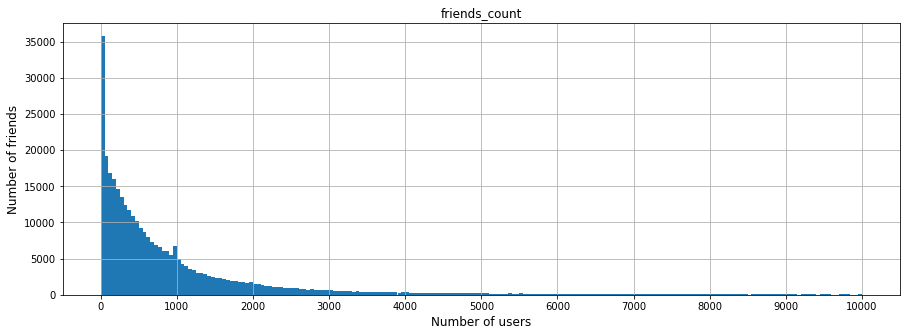

In [143]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['friends_count'] < fr_max].hist(column='friends_count', bins=200, ax=ax)
plt.xticks(np.arange(0, fr_max+1, fr_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of friends",fontsize=12)

plt.show()

In [104]:
status_max = 100000

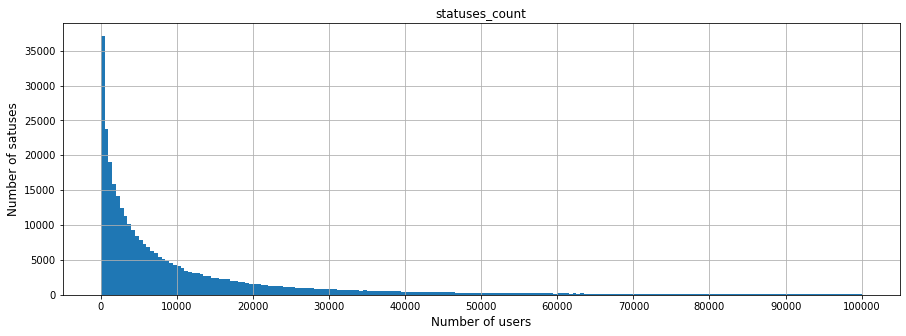

In [144]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['statuses_count'] < status_max].hist(column='statuses_count', bins=200, ax=ax)
plt.xticks(np.arange(0, status_max+1, status_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of satuses",fontsize=12)

plt.show()

In [116]:
list_max = 5000

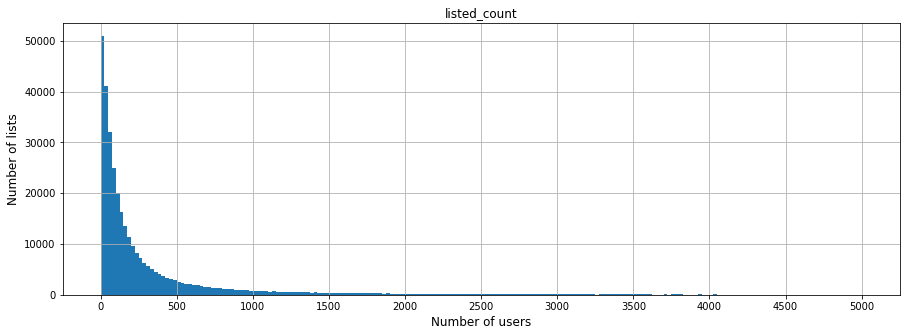

In [145]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['listed_count'] < list_max].hist(column='listed_count', bins=200, ax=ax)
plt.xticks(np.arange(0, list_max+1, list_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of lists",fontsize=12)

plt.show()

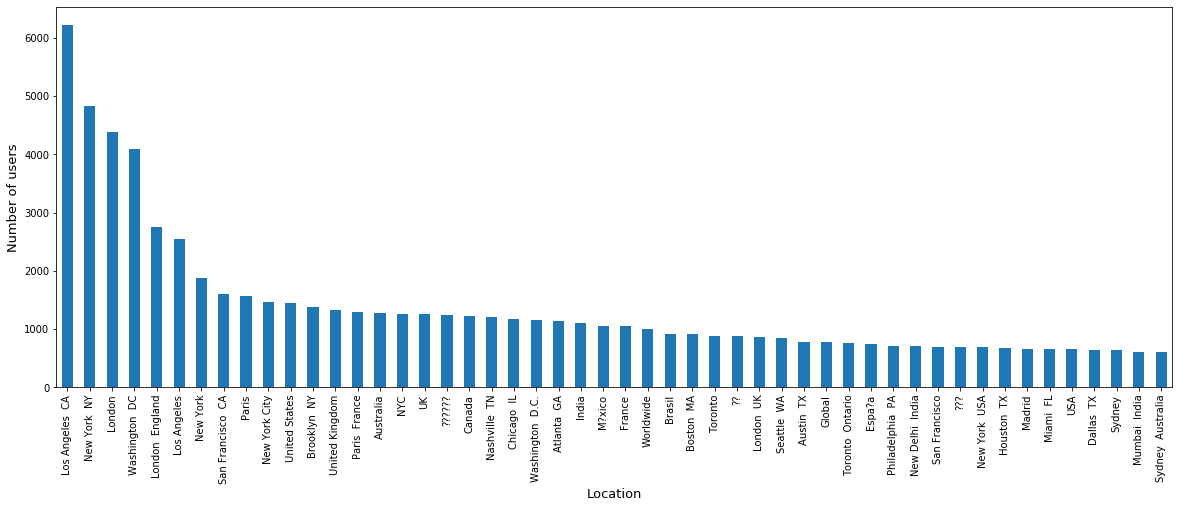

In [147]:
df["location"].value_counts()[:50].plot.bar(figsize=(20,7))

plt.xlabel("Location", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

Because of the abscence of auto-complete, a lot of the same places have different spellings, and the same cities are abrieviated in some instances but not in others. Still this chart is useful identifying some of the major cities and countries that verified users commonly reside in.

In [125]:
dates = list(df['created_at'].values)

In [126]:
created = []

for date in dates:
    created.append(date.split()[-1])

In [150]:
df['created_at'][0].split()[1]

'Mar'

In [130]:
df['year'] = created

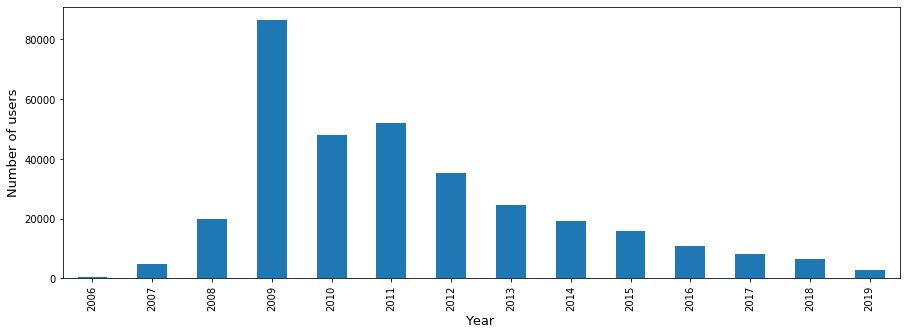

In [148]:
df['year'].groupby(df["year"]).count().plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

A big chunk verified accounts were created in 2009, which was when Twitter was most popular. Since then there has been a steady decline, and in the last two years, this may be party due to the fact that Twitter has paused public submissions for verification since early 2018.

In [151]:
months = []

for date in dates:
    months.append(date.split()[1])

In [152]:
df['month'] = months

In [154]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

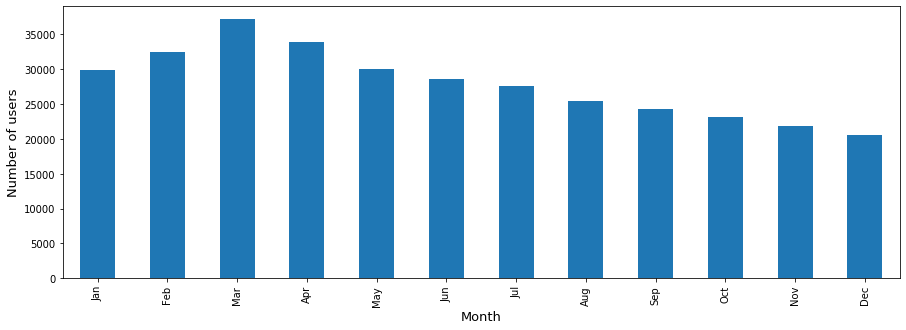

In [157]:
df['month'].groupby(df["month"]).count().loc[order].plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Month", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()